# The scope of the project

### Step 1:-  Problem understanding
- You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

### Step 2:- Goal

- You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.
- This notebook contains an analysis on some marketing data. The goal for this project was to do the following:

1. Get acquainted with the data
2. Clean the data so it is ready for analysis
3. Develop some questions for analysis
4. Analyze variables within the data to gain patterns and insights on these questions

### Step 3:- Data

- The data for this project was downloaded from Kaggle:

   https://www.kaggle.com/jackdaoud/marketing-data  

Information regarding the features for the data are located in the Column section on the website.

Note:- always find a dataset that is there with data dictionary.
### Step 4 :-  Data & Statistical Analysis 

Recent marketing campaigns have not been as effective as they were expected to be.
- Q1. Do customers buy products based on their income or based on the age group or based on the education level?
- Q2. Do customers purchase products through online store or store purchase?
- Q3. what and where to market our deals, so that customers visit store or online?
  
The following independent variables will be focused on in the analysis:

- income
- education
- age.


- The goal will be to see how these independent variables associate with the following dependent variables:

. mnt_wines
. mnt_fruits
. mnt_meat_products
. mnt_fish_products
. mnt_sweet_products
. mnt_gold_products
. num_deals_purchases
. num_web_purchases
. num_catalog_purchases
. num_store_purchases

### Step 5 :- Evaluation

- The information we generate from our Analysis will be helpful for a marketing department, strategies could be used to increase customers for the store.

## Import python Modules

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import re

## Loading the Data

- `marketing_data.csv` are read in as `DataFrame` called `marketing_data`
-  The DataFrame is glimpsed with `.head()` to check its contents.
-  `marketing_data.info` to show concise summary of the DataFrame.

In [4]:
marketing_data = pd.read_csv("marketing_data.csv")
marketing_data.head(15)


,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [6]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

- see what columns have missing data
- Income has missing value


In [8]:
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

  - describe() method,  generates descriptive statistics of numeric columns in a  dataframe, provides shape of a datsets's distribution excluding 'NaN' values.

In [10]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

## Analysis
#### Data Cleaning and feature engineering
- `Income` variable is one of the main variables that will explored in the analysis, so it is essential that it is tidy and ready for exploration.
- `Income` has `dollar sign($)`, i will take out the `$` Change `Income value` to float and replace the missing values of income with the mean income using `.mean()` method.
- But, before applying `.mean()` and cleaning the data, i want to check for the rows having `Null values`so i will be able to take decision whether to give `.mean' or drop` the rows
- Lets do some `Feature Engineering` to get `Age` that can be derived from `Year_Birth` and `Age_Group` from `Age`.

- If no income value is found, the `re.sub` operation will raise an error. To handle this, you can check if income is empty before applying `re.sub`.

- its with this block of code i was getting type error : can only concatenate str to str.
- i am returning `None` if there are `NaN` values, while i apply mean  to the income column to replace the `NaN` values, the function is identifying str(None) that is why it is not able to fill with mean.

- By analyzing the data where `Income` is `NaN`, it wouldn't make any sense to drop the rows of data cause by looking at the data they seem to be potential customers for stores business and from different countries will ikely effect the analysis later on when we are comparing countries.
- i will replace the `Nan` value with the `.mean`.

- Reolved the issue without using `re` modeule and not using `if-else` statement because it returned `NaN` values as `None` when it came to filling the `NaN` values with the `mean` it gave me a `Type Error` can only concatenate  str to str. then i refered to `pandas` module using `replace` method to remove `$ and comma(,)` and converted string to numeric variable beacuse `.mean()` can only change numeric values including float values. then calculating mean and lastly using `fillna()` method to replace the `NaN` values with mean.

In [12]:
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)

In [14]:
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

- I will remove the outliers,so that we will have a symmetric distribution.

<Axes: xlabel='Income'>

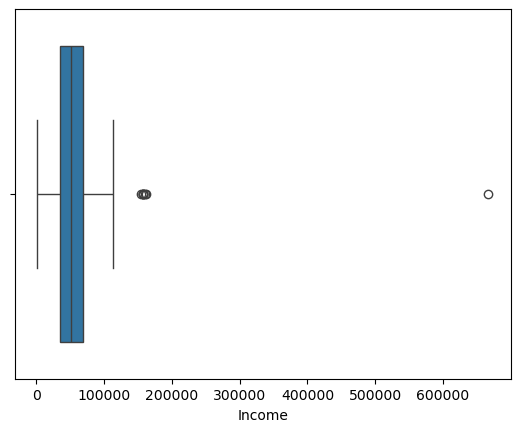

In [18]:
sns.boxplot(x=marketing_data["Income"])

<Axes: xlabel='Income'>

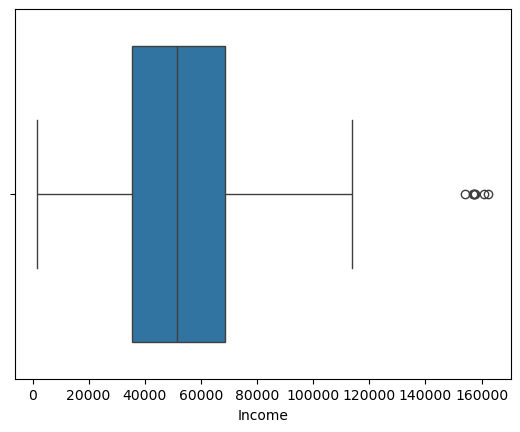

In [23]:
marketing_data = marketing_data[marketing_data['Income']<300000]

sns.boxplot(x = marketing_data['Income'])

In [25]:
marketing_data['Income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

In [31]:
marketing_data['Age'] = 2024 - marketing_data['YearBirth']
marketing_data['Age']

/var/folders/qw/md3bjmtd72x5ldhsygh969d80000gp/T/ipykernel_64505/431499844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['Age'] = 2024 - marketing_data['YearBirth']


0       54
1       63
2       66
3       57
4       35
        ..
2235    48
2236    47
2237    48
2238    46
2239    55
Name: Age, Length: 2215, dtype: int64

### Checking the education Variable
- the Education variable is another column that will be focused on in the analysis. A boxplot is used to see if any cleaning is needed before doing EDA

In [59]:
education_cols = ['education_Basic', 'education_Graduation', 'education_2n Cycle', 'education_Masters', 'education_PhD']
df_melted = marketing_data.melt(id_vars=['Income'], value_vars=education_cols, 
                                var_name='Education_Level', value_name='Education')

# Filter out rows where Education is NaN (assuming it indicates the person doesn't have that education level)
df_melted = df_melted.dropna(subset=['Education'])

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education_Level', y='Income', data=df_melted,
            order=education_cols)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.title('Income by Education Level')
plt.show()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['education_Masters']"